In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import pickle
import json

import warnings

In [2]:
warnings.filterwarnings("ignore")
df = pd.read_excel("hackathon.xlsx")
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Hackathons,Gender,Introvert,Age,Public_speaker,Interested Type of Books,In a Realtionship?,Specialization
0,79,75,96,7.0,10.0,3.0,M,no,28,yes,Prayer books,no,Analysis&Management
1,66,76,72,14.0,NaN,NaN,F,yes,21,no,Childrens,yes,IT
2,89,88,70,6.0,3.0,2.0,M,no,21,yes,Travel,yes,IT
3,71,96,74,7.0,7.0,5.0,F,no,20,yes,Romance,yes,IT
4,62,62,77,7.0,1.0,1.0,M,yes,31,yes,Cookbooks,no,Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,81,88,80,4.0,5.0,0.0,F,no,20,yes,Journals,no,Design
19996,85,92,97,11.0,5.0,1.0,F,no,21,yes,Cookbooks,yes,Design
19997,71,76,83,9.0,5.0,2.0,M,no,21,no,Drama,yes,IT
19998,64,81,90,NaN,7.0,6.0,M,no,24,yes,Travel,yes,Design


In [3]:
df = df[df["Communication_skills_test"] != "unknow"]

In [4]:
df['Gender'] = df['Gender'].replace( ['F', 'M'], [0, 1])
df['Introvert'] = df['Introvert'].replace( ['no', 'yes'], [0, 1])
df['Public_speaker'] = df['Public_speaker'].replace( ['no', 'yes'], [0, 1])
df['In a Realtionship?'] = df['In a Realtionship?'].replace( ['no', 'yes'], [0, 1])

In [5]:
df.isnull().sum()

Math_test                       0
Programming_Concepts_test       0
Communication_skills_test       0
Working_per_day              1990
Logic_test                   2009
Hackathons                   6646
Gender                       2029
Introvert                       0
Age                             0
Public_speaker                  0
Interested Type of Books        0
In a Realtionship?              0
Specialization                  0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Math_test,19999.0,77.105855,10.243136,59.0,68.0,77.0,86.0,97.0
Programming_Concepts_test,19999.0,77.210061,10.245678,59.0,68.0,77.0,86.0,97.0
Working_per_day,18009.0,8.375257,2.860076,3.0,6.0,8.0,11.0,14.0
Logic_test,17990.0,5.188160,2.765705,0.0,3.0,5.0,7.0,10.0
Hackathons,13353.0,2.984498,2.006277,0.0,1.0,3.0,5.0,6.0
Gender,17970.0,0.490818,0.499930,0.0,0.0,0.0,1.0,1.0
Introvert,19999.0,0.460523,0.498452,0.0,0.0,0.0,1.0,1.0
Age,19999.0,24.428171,3.780709,6.0,22.0,24.0,27.0,39.0
Public_speaker,19999.0,0.516326,0.499746,0.0,0.0,1.0,1.0,1.0
In a Realtionship?,19999.0,0.480574,0.499635,0.0,0.0,0.0,1.0,1.0


In [7]:
df.drop(columns=["Hackathons"], inplace=True)

In [8]:
missed_columns = ["Working_per_day", "Logic_test", "Gender", "Interested Type of Books", "Specialization"]

missing_data = df[df["Working_per_day"].isnull()]
non_missing_data = df[df["Working_per_day"].notnull()]


X = non_missing_data.drop(missed_columns, axis=1)
y = non_missing_data["Working_per_day"]


# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Use the trained model to predict missing values
X_missing = missing_data.drop(missed_columns, axis=1)
predicted_values = rf_model.predict(X_missing)

# Replace missing values with predicted values in the original DataFrame
df.loc[df["Working_per_day"].isnull(), "Working_per_day"] = predicted_values


In [9]:
missed_columns = ["Working_per_day", "Logic_test", "Gender", "Interested Type of Books", "Specialization"]

missing_data = df[df["Logic_test"].isnull()]
non_missing_data = df[df["Logic_test"].notnull()]


X = non_missing_data.drop(missed_columns, axis=1)
y = non_missing_data["Logic_test"]


# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Use the trained model to predict missing values
X_missing = missing_data.drop(missed_columns, axis=1)
predicted_values = rf_model.predict(X_missing)

# Replace missing values with predicted values in the original DataFrame
df.loc[df["Logic_test"].isnull(), "Logic_test"] = predicted_values


In [10]:
df.isnull().sum()

Math_test                       0
Programming_Concepts_test       0
Communication_skills_test       0
Working_per_day                 0
Logic_test                      0
Gender                       2029
Introvert                       0
Age                             0
Public_speaker                  0
Interested Type of Books        0
In a Realtionship?              0
Specialization                  0
dtype: int64

In [11]:
known_gender = df[df['Gender'].notna()]
missing_gender = df[df['Gender'].isna()]

clf = RandomForestClassifier()
clf.fit(known_gender.drop(['Gender', 'Specialization', 'Interested Type of Books'], axis=1), known_gender['Gender'])

predicted_gender = clf.predict(missing_gender.drop(['Gender', 'Specialization', 'Interested Type of Books'], axis=1))

# Assign predicted values to the missing gender rows
df.loc[df['Gender'].isna(), 'Gender'] = predicted_gender

In [12]:
numeric_columns = df.select_dtypes(include=[np.number])

z_scores = np.abs(stats.zscore(numeric_columns))

threshold = 2.5

outlier_mask = z_scores > threshold

df = df[~outlier_mask.any(axis=1)]

outlier_counts = outlier_mask.sum(axis=0)
print("Number of outliers in each column:")
print(outlier_counts)


Number of outliers in each column:
Math_test                      0
Programming_Concepts_test      0
Working_per_day                0
Logic_test                     0
Gender                         0
Introvert                      0
Age                          210
Public_speaker                 0
In a Realtionship?             0
dtype: int64


In [13]:
target_column = df["Specialization"]

label_encoder = LabelEncoder()

encoded_target = label_encoder.fit_transform(target_column)

df["Specialization"] = encoded_target

In [41]:
label_encoder.inverse_transform([2])

array(['IT'], dtype=object)

In [14]:
df_dummies = pd.get_dummies(df['Interested Type of Books'], prefix='')

# # Standardize the data (important for PCA)
# scaler = StandardScaler()
# with open('pca_scaler.pkl', 'wb') as model_file:
#     pickle.dump(scaler, model_file)

# df_scaled = scaler.fit_transform(df_dummies)

n_components = 3 
pca = PCA(n_components=n_components)

# Fit the PCA model to your data
pca_data = pca.fit_transform(df_dummies)

pca_labels = pd.DataFrame(data=pca_data, columns=[f'PCA_{i+1}' for i in range(n_components)])

print(pca_labels.shape)
print(df.shape)

df = pd.concat([df, pca_labels], axis=1)
with open('pca_model.pkl', 'wb') as model_file:
    pickle.dump(pca, model_file)

df.drop(columns=["Interested Type of Books"], inplace=True)
df.head()

(19789, 3)
(19789, 12)


,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,In a Realtionship?,Specialization,PCA_1,PCA_2,PCA_3
0,79.0,75.0,96,7.0,10.00,1.0,0.0,28.0,1.0,0.0,0.0,-0.002241,0.012009,0.012606
1,66.0,76.0,72,14.0,5.05,0.0,1.0,21.0,0.0,1.0,2.0,-0.000854,0.010085,0.009008
2,89.0,88.0,70,6.0,3.00,1.0,0.0,21.0,1.0,1.0,2.0,-0.001625,0.008418,0.011831
3,71.0,96.0,74,7.0,7.00,0.0,0.0,20.0,1.0,1.0,2.0,0.001453,0.007977,0.007692
4,62.0,62.0,77,7.0,1.00,1.0,1.0,31.0,1.0,0.0,1.0,-0.001695,0.006180,0.006161


In [15]:
print(df_dummies.columns)

Index(['_Action and Adventure', '_Anthology', '_Art', '_Autobiographies',
       '_Biographies', '_Childrens', '_Comics', '_Cookbooks', '_Diaries',
       '_Dictionaries', '_Drama', '_Encyclopedias', '_Fantasy', '_Guide',
       '_Health', '_History', '_Horror', '_Journals', '_Math', '_Mystery',
       '_Poetry', '_Prayer books', '_Religion-Spirituality', '_Romance',
       '_Satire', '_Science', '_Science fiction', '_Self help', '_Series',
       '_Travel', '_Trilogy'],
      dtype='object')


In [16]:
df.dropna(inplace=True)

In [17]:
sub = df[["Math_test", "Programming_Concepts_test", "Communication_skills_test", "Working_per_day", "Logic_test"]]
sub = pd.DataFrame(sub)
kmeans = KMeans(n_clusters=3).fit(sub)   
df['labels'] = kmeans.labels_

da = df.groupby(by=['labels']).mean()
da = da.reset_index()
da = dict( zip( da['labels'], da['Specialization'] ) )
print(da)
file_path = "labels_weight.json"
with open(file_path, "w") as json_file:
    json.dump(da, json_file)

df['labels'] = df['labels'].map(da)
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

print(df['labels'].corr(df['Specialization']))

{0: 0.9885258964143426, 1: 0.916107931316435, 2: 0.5317195325542571}
0.2739906221013775


In [18]:
df['Communication_skills_test'] = pd.to_numeric(df['Communication_skills_test'], errors='coerce')

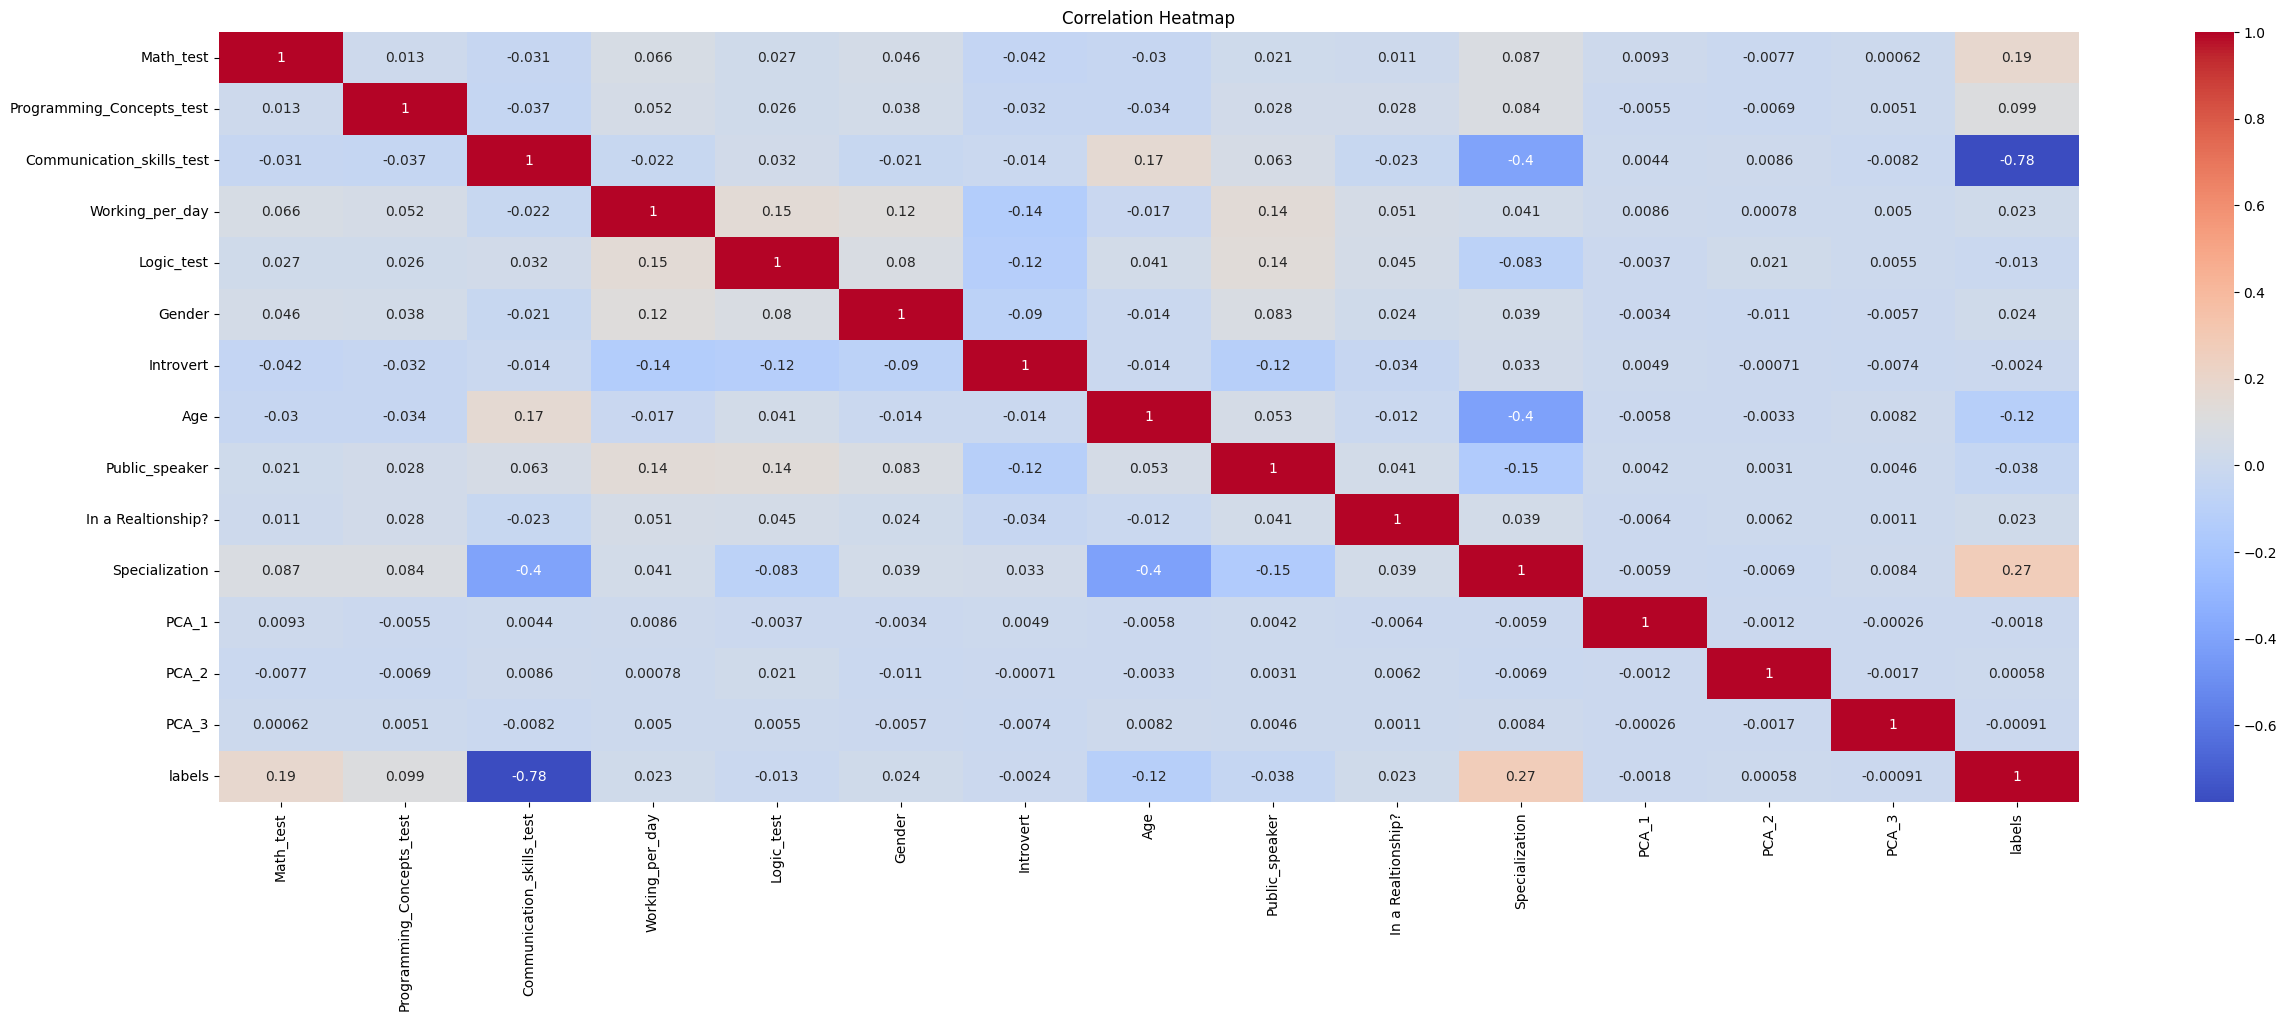

In [19]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(30, 10))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set labels and title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [20]:
target = "Specialization"

In [21]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = df.columns[df.columns != target]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df[columns_to_scale])
# Fit and transform the selected columns
with open('scaler.pkl', 'wb') as model_file:
    pickle.dump(scaler, model_file)
df[columns_to_scale] = scaler.transform(df[columns_to_scale])


In [22]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,In a Realtionship?,Specialization,PCA_1,PCA_2,PCA_3,labels
0,0.526316,0.421053,0.804348,0.363636,1.000,1.0,0.0,0.722222,1.0,0.0,0.0,0.459549,0.461520,0.404465,0.000000
1,0.184211,0.447368,0.282609,1.000000,0.505,0.0,1.0,0.333333,0.0,1.0,2.0,0.460535,0.459973,0.401758,0.841469
2,0.789474,0.763158,0.239130,0.272727,0.300,1.0,0.0,0.333333,1.0,1.0,2.0,0.459987,0.458634,0.403883,1.000000
3,0.315789,0.973684,0.326087,0.363636,0.700,0.0,0.0,0.277778,1.0,1.0,2.0,0.462176,0.458279,0.400768,0.841469
4,0.078947,0.078947,0.391304,0.363636,0.100,1.0,1.0,0.888889,1.0,0.0,1.0,0.459938,0.456835,0.399615,0.841469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19784,0.052632,0.394737,0.934783,0.545455,0.800,1.0,1.0,0.555556,1.0,1.0,0.0,0.458995,0.457533,0.400210,0.000000
19785,0.026316,0.078947,0.565217,0.272727,0.500,0.0,1.0,0.444444,0.0,1.0,0.0,0.459938,0.456835,0.399615,0.841469
19786,0.578947,0.447368,0.326087,0.454545,0.700,0.0,0.0,0.777778,0.0,0.0,0.0,0.459311,0.458707,0.403637,1.000000
19787,0.868421,0.500000,0.304348,0.545455,0.200,0.0,1.0,0.555556,0.0,1.0,1.0,0.459987,0.458634,0.403883,1.000000


In [23]:
target = "Specialization"

X = df.drop([target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.80
Confusion Matrix:
[[1347  189   82]
 [ 207 1271   55]
 [ 141   98  526]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1618
         1.0       0.82      0.83      0.82      1533
         2.0       0.79      0.69      0.74       765

    accuracy                           0.80      3916
   macro avg       0.80      0.78      0.79      3916
weighted avg       0.80      0.80      0.80      3916



In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the model to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [26]:
best_model

RandomForestClassifier(max_features='log2', min_samples_leaf=4, n_estimators=50)

In [27]:
best_params

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': True}

In [28]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_split=2, min_samples_leaf=4,
                                       max_features="log2", bootstrap=True, max_depth= None )
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.80
Confusion Matrix:
[[1345  186   87]
 [ 205 1276   52]
 [ 145   99  521]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1618
         1.0       0.82      0.83      0.82      1533
         2.0       0.79      0.68      0.73       765

    accuracy                           0.80      3916
   macro avg       0.80      0.78      0.79      3916
weighted avg       0.80      0.80      0.80      3916



In [29]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the model to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [30]:
best_params

{'subsample': 0.8,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.2,
 'colsample_bytree': 0.9}

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,         # Number of boosting rounds (trees)
    learning_rate=0.2,        # Step size or shrinkage
    max_depth=3,              # Maximum depth of each tree  
    subsample=0.8,            # Fraction of samples used for fitting trees
    colsample_bytree=0.9,     # Fraction of features used for building trees
)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate the F1 score for multiclass classification (e.g., 'macro' average)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Macro Average): {f1:.2f}")


Accuracy: 0.81
Confusion Matrix:
[[1374  174   70]
 [ 195 1286   52]
 [ 151   89  525]]
F1 Score (Macro Average): 0.80


In [32]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_split=2, min_samples_leaf=4,
                                       max_features="log2", bootstrap=True, max_depth= None )
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_classifier, model_file)

Accuracy: 0.80
Confusion Matrix:
[[1345  186   87]
 [ 205 1276   52]
 [ 145   99  521]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      1618
         1.0       0.82      0.83      0.82      1533
         2.0       0.79      0.68      0.73       765

    accuracy                           0.80      3916
   macro avg       0.80      0.78      0.79      3916
weighted avg       0.80      0.80      0.80      3916



In [33]:
df.columns

Index(['Math_test', 'Programming_Concepts_test', 'Communication_skills_test',
       'Working_per_day', 'Logic_test', 'Gender', 'Introvert', 'Age',
       'Public_speaker', 'In a Realtionship?', 'Specialization', 'PCA_1',
       'PCA_2', 'PCA_3', 'labels'],
      dtype='object')

In [34]:
df

,Math_test,Programming_Concepts_test,Communication_skills_test,Working_per_day,Logic_test,Gender,Introvert,Age,Public_speaker,In a Realtionship?,Specialization,PCA_1,PCA_2,PCA_3,labels
0,0.526316,0.421053,0.804348,0.363636,1.000,1.0,0.0,0.722222,1.0,0.0,0.0,0.459549,0.461520,0.404465,0.000000
1,0.184211,0.447368,0.282609,1.000000,0.505,0.0,1.0,0.333333,0.0,1.0,2.0,0.460535,0.459973,0.401758,0.841469
2,0.789474,0.763158,0.239130,0.272727,0.300,1.0,0.0,0.333333,1.0,1.0,2.0,0.459987,0.458634,0.403883,1.000000
3,0.315789,0.973684,0.326087,0.363636,0.700,0.0,0.0,0.277778,1.0,1.0,2.0,0.462176,0.458279,0.400768,0.841469
4,0.078947,0.078947,0.391304,0.363636,0.100,1.0,1.0,0.888889,1.0,0.0,1.0,0.459938,0.456835,0.399615,0.841469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19784,0.052632,0.394737,0.934783,0.545455,0.800,1.0,1.0,0.555556,1.0,1.0,0.0,0.458995,0.457533,0.400210,0.000000
19785,0.026316,0.078947,0.565217,0.272727,0.500,0.0,1.0,0.444444,0.0,1.0,0.0,0.459938,0.456835,0.399615,0.841469
19786,0.578947,0.447368,0.326087,0.454545,0.700,0.0,0.0,0.777778,0.0,0.0,0.0,0.459311,0.458707,0.403637,1.000000
19787,0.868421,0.500000,0.304348,0.545455,0.200,0.0,1.0,0.555556,0.0,1.0,1.0,0.459987,0.458634,0.403883,1.000000
